In [1]:
from transformers import AutoTokenizer
import conllu
import numpy as np

In [2]:
path_conllu = "/home/wran/corpus/treebank/SUD/SUD_Naija/agregate_file/naija_sud_agregate_MG.conllu"

In [3]:
bert_modeles = {
    "BERT anglais":"bert-base-uncased",
    "BERT chinois": "bert-base-chinese",
    "BERT multilingue": "bert-base-multilingual-uncased",
    "CamemBERT": "camembert-base",
}
               


In [4]:
with open(path_conllu, "r", encoding="utf-8") as infile:
    parsed_conllu = conllu.parse(infile.read())

In [5]:
for name, code_name in bert_modeles.items():
    tokenizer = AutoTokenizer.from_pretrained(code_name)

/home/wran/venvs/pytorch-venv/lib/python3.8/site-packages/transformers/tokenization_utils.py:828: FutureWarning: Parameter max_len is deprecated and will be removed in a future release. Use model_max_length instead.
  warnings.warn(


In [29]:
dict_subwords = {}
for name, code_name in bert_modeles.items():
    tokenizer = AutoTokenizer.from_pretrained(code_name)
    
    list_n_subwords = []
    for sequence in parsed_conllu:
        sequence_len_subwords = []
        for token in sequence:
            if token['upos'] != "PUNCT":
                sequence_len_subwords.append(len(tokenizer.encode(token['form'], add_special_tokens=False)))
        list_n_subwords.append(np.mean(sequence_len_subwords))
    dict_subwords[code_name] = list_n_subwords
    print(name)
    print(np.mean(list_n_subwords))
    print(np.std(list_n_subwords))

BERT anglais
1.1788830405094486
0.24169747115035914
BERT chinois
1.4638562343707695
0.33062243920788653
BERT multilingue
1.1710605296977665
0.2328380676085307


/home/wran/venvs/pytorch-venv/lib/python3.8/site-packages/transformers/tokenization_utils.py:828: FutureWarning: Parameter max_len is deprecated and will be removed in a future release. Use model_max_length instead.
  warnings.warn(


CamemBERT
1.5540440711846322
0.3026882099496514


In [41]:
table_subwords = pd.DataFrame(columns = ['modèle' ,'moyenne', 'écart-type'])
for i, (name, code_name) in enumerate(bert_modeles.items()):
    table_subwords.loc[i] = [name] + [round(np.mean(dict_subwords[code_name]), 2), round(np.std(dict_subwords[code_name]), 2)]
table_subwords.set_index('modèle')    

,moyenne,écart-type
modèle,,
BERT anglais,1.18,0.24
BERT chinois,1.46,0.33
BERT multilingue,1.17,0.23
CamemBERT,1.55,0.30


In [37]:
table_subwords

,modèle,moyenne,écart-type
0,BERT anglais,1.178883,0.241697
1,BERT chinois,1.463856,0.330622
2,BERT multilingue,1.171061,0.232838
3,CamemBERT,1.554044,0.302688


In [7]:
## numpy is used for creating fake data
import numpy as np 
#import matplotlib as mpl 

## agg backend is used to create plot as a .png file
#mpl.use('agg')

import matplotlib.pyplot as plt 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccd8061e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccd8077550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccd8061af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccd8077c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccd8077f10>],
 'means': []}

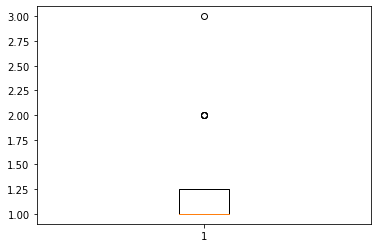

In [8]:
plt.boxplot(list(dict_subwords.values())[0][:20])

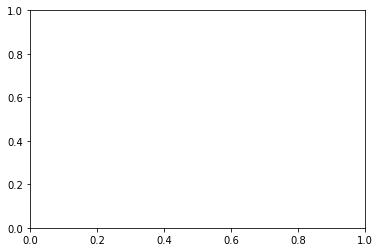

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

In [10]:
ax.boxplot(list(dict_subwords.values())[0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccd7d61190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccd7d5bbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccd7d61430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccd7d5b490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccd7e023a0>],
 'means': []}

In [11]:
fig.show()

<ipython-input-11-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x7fccd7d1be20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccd7d29520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccd7d1bac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccd7d29be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccd7d29ee0>],
 'means': []}

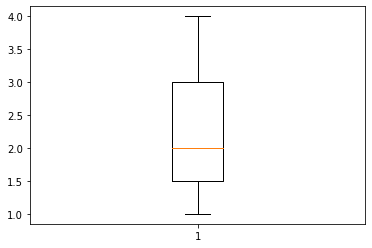

In [12]:
plt.boxplot([1,2,4])

In [13]:
fig.savefig("boxplot.png")

In [14]:
%matplotlib inline
fig.show()

<ipython-input-14-4ce54b945aec>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x7fccd7c93520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccd7c93be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccd7c931c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccd7c9c2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccd7c9c5e0>],
 'means': []}

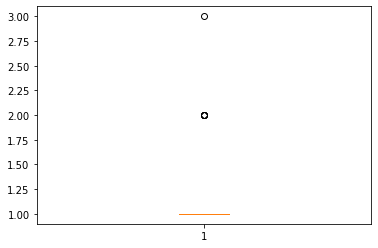

In [15]:
plt.boxplot([float(x) for x in list(dict_subwords.values())[0][:30]])

In [16]:
list(dict_subwords.values())[0][:30]

[2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccd7c6d940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccd7c78070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccd7c6d5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccd7c78730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccd7c78a30>],
 'means': []}

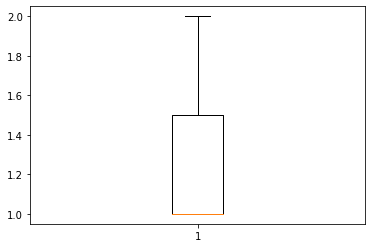

In [17]:
plt.boxplot([2, 1, 1])

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [20]:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)

Text(0.0, 1.0, 'Boxplot with jitter')

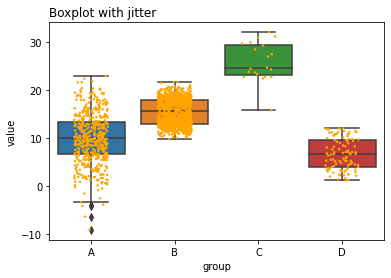

In [21]:
ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")

In [22]:
df

,group,value
0,A,14.633095
1,A,2.022398
2,A,8.557040
3,A,8.818473
4,A,1.844704
...,...,...
95,D,3.942218
96,D,11.896523
97,D,5.113153
98,D,4.433350


In [30]:
global_df = pd.DataFrame()
for key, value in dict_subwords.items():
    group_df = pd.DataFrame({ 'group' : np.repeat(key,len(value)), 'value': value })
    global_df = global_df.append(group_df)

In [31]:
global_df

,group,value
0,bert-base-uncased,1.216216
1,bert-base-uncased,1.166667
2,bert-base-uncased,1.111111
3,bert-base-uncased,1.250000
4,bert-base-uncased,1.200000
...,...,...
7624,camembert-base,1.419355
7625,camembert-base,1.111111
7626,camembert-base,1.400000
7627,camembert-base,1.516129


Text(0.0, 1.0, 'Boxplot with jitter')

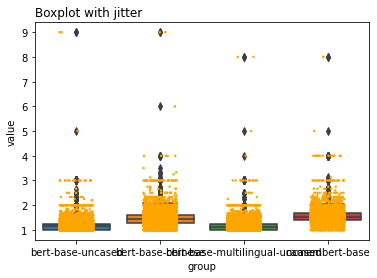

In [32]:
ax = sns.boxplot(x='group', y='value', data=global_df)
ax = sns.stripplot(x='group', y='value', data=global_df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")